# Advanced Machine Learning Lab (PDS2101)


Submitted By : Subrat Ku Nanda

## Experiment - 4.1
Aim of your experiment : LeNet-5 on Fashion_MNIST dataset compute the classification accuracy and the detailed computation of learning parameters in each of the layers

Learning Objectives : 

- Transfer learning through Pre-trained models is a time and cost-efficient solution for deep learning problems.

- Understand the Architecture of Lenet-5.

Why CNN?

CNN is a class of Neural Networks excelling in the classification of images (and other tasks related to images). It is based on partially connected layers (in contrast to fully-connected) and is currently a state-of-the art algorithm to perform this image-related tasks. Note that it is also technically possible to use fully connected layers but it is sub-optimal approach due to a huge number of parameters it needs to learn.

Why Keras?

Keras is user-friendly, modular and high-level neural network APIs. It makes reading code, building models and learning very easy. It works with TensorFlow, CNTK, Theano, MXNet, and PlaidML. More about Keras you can read the official keras webpage or in the TensorFlow Guide to High-Level APIs.

What is Lenet5?
Lenet-5 is one of the earliest pre-trained models proposed by Yann LeCun and others in the year 1998, in the research paper Gradient-Based Learning Applied to Document Recognition. They used this architecture for recognizing the handwritten and machine-printed characters.

The main reason behind the popularity of this model was its simple and straightforward architecture. It is a multi-layer convolution neural network for image classification.

**The Architecture of the Model**

LeNet5 is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full link layer. It is the basis of other deep learning models. Here we analyze LeNet5 in depth. At the same time, through example analysis, deepen the understanding of the convolutional layer and pooling layer.






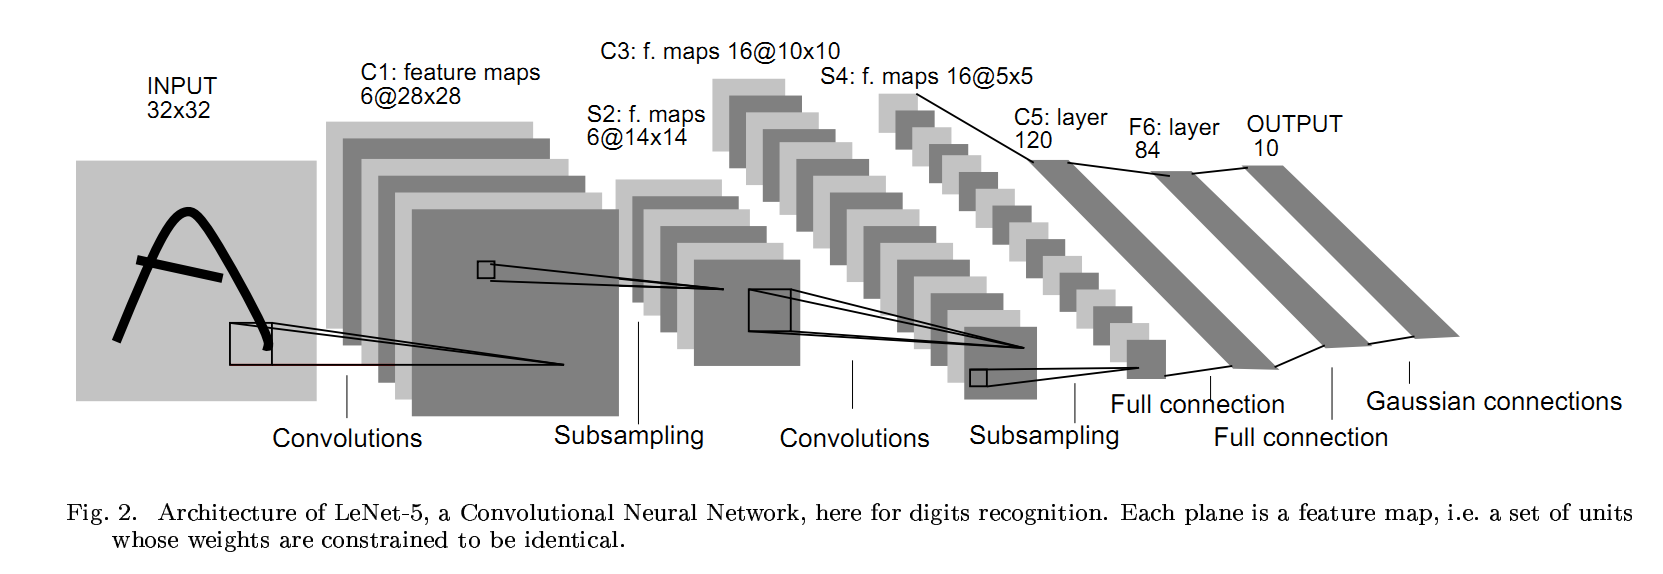

The network has 5 layers with learnable parameters and hence named Lenet-5. It has three sets of convolution layers with a combination of average pooling. After the convolution and average pooling layers, we have two fully connected layers. At last, a Softmax classifier which classifies the images into respective class.



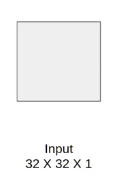


The input to this model is a 32 X 32 grayscale image hence the number of channels is one.

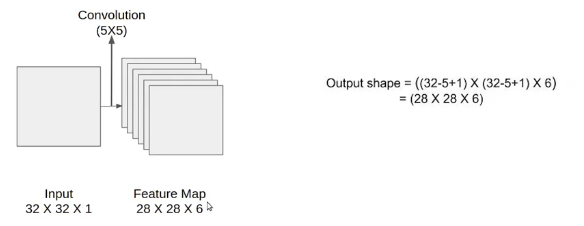

 



We then apply the first convolution operation with the filter size 5X5 and we have 6 such filters. As a result, we get a feature map of size 28X28X6. Here the number of channels is equal to the number of filters applied.







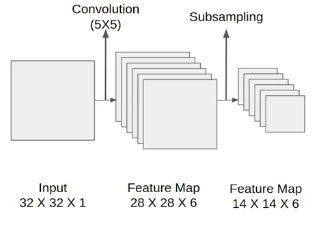

After the first pooling operation, we apply the average pooling and the size of the feature map is reduced by half. Note that, the number of channels is intact.







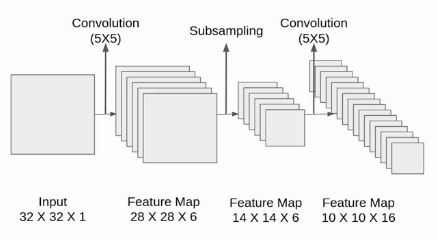

Next, we have a convolution layer with sixteen filters of size 5X5. Again the feature map changed it is 10X10X16. The output size is calculated in a similar manner. After this, we again applied an average pooling or subsampling layer, which again reduce the size of the feature map by half i.e 5X5X16.





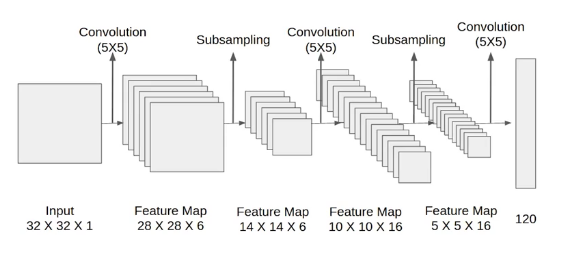

Then we have a final convolution layer of size 5X5 with 120 filters. As shown in the above image. Leaving the feature map size 1X1X120. After which flatten result is 120 values.

After these convolution layers, we have a fully connected layer with eighty-four neurons. At last, we have an output layer with ten neurons since the data have ten classes.

Here is the final architecture of the Lenet-5 model.




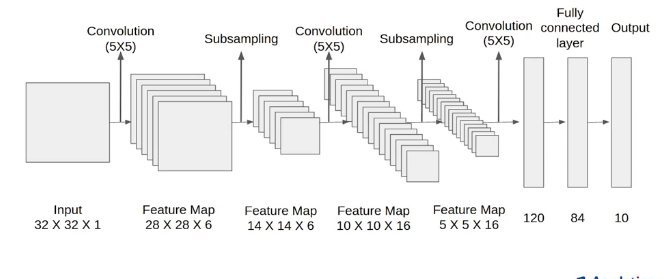

##### Architecture Details

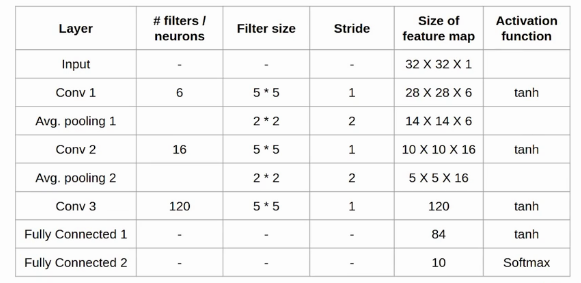

The first layer is the input layer with feature map size 32X32X1.

Then we have the first convolution layer with 6 filters of size 5X5 and stride is 1. The activation function used at his layer is tanh. The output feature map is  28X28X6.

Next, we have an average pooling layer with filter size 2X2 and stride 1. The resulting feature map is 14X14X6. Since the pooling layer doesn’t affect the number of channels.

After this comes the second convolution layer with 16 filters of 5X5 and stride 1. Also, the activation function is tanh. Now the output size is 10X10X16.

Again comes the other average pooling layer of 2X2 with stride 2. As a result, the size of the feature map reduced to 5X5X16.

The final pooling layer has 120 filters of 5X5  with stride 1 and activation function tanh. Now the output size is 120.

The next is a fully connected layer with 84 neurons that result in the output to 84 values and the activation function used here is again tanh.

The last layer is the output layer with 10 neurons and  Softmax function. The Softmax gives the probability that a data point belongs to a particular class. The highest value is then predicted.

This is the entire architecture of the Lenet-5 model. The number of trainable parameters of this architecture is around sixty thousand.

### Code

In [35]:
# Importing necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

Loading Dataset

In [5]:
# Loading the dataset and perform splitting
fashion_mnist = tf.keras.datasets.fashion_mnist


In [6]:
( train_images, train_labels ) , ( test_images, test_labels ) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [11]:
x_train= train_images.reshape(train_images.shape[0],28,28)
x_test=  test_images.reshape(test_images.shape[0],28,28)
input_shape=(28,28)
y_train=keras.utils.to_categorical(train_labels)#,num_classes=)
y_test=keras.utils.to_categorical(test_labels)#, num_classes)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /=255

In [12]:
# Display size of train and test

print('Shape of Train Image : ',x_train.shape)
print('Shape of Test Image : ',x_test.shape)
print("Length of Train = ",str(len(x_train)))
print("Length of Test = ",str(len(x_test)))

Shape of Train Image :  (60000, 28, 28)
Shape of Test Image :  (10000, 28, 28)
Length of Train =  60000
Length of Test =  10000


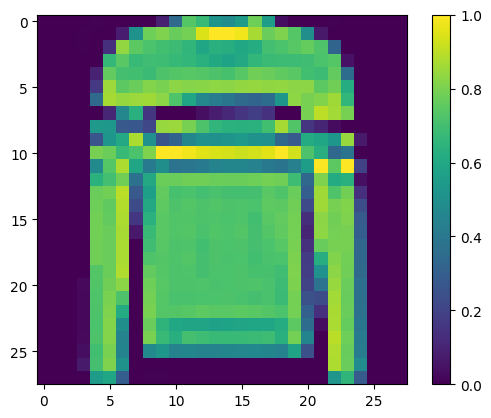

In [13]:
plt.figure()

plt.imshow(x_train[5] )
plt.colorbar()

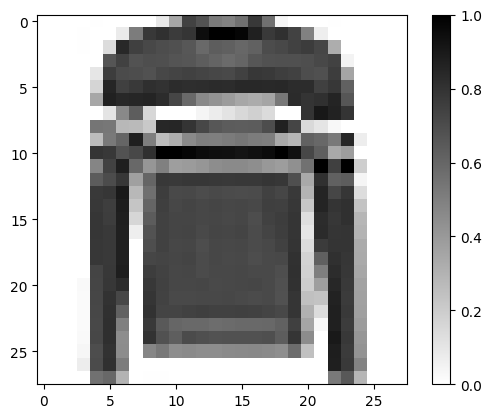

In [14]:
plt.figure()

plt.imshow(x_train[5], cmap = plt.cm.binary  )
plt.colorbar()

In [15]:
class_names = ['Tshirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

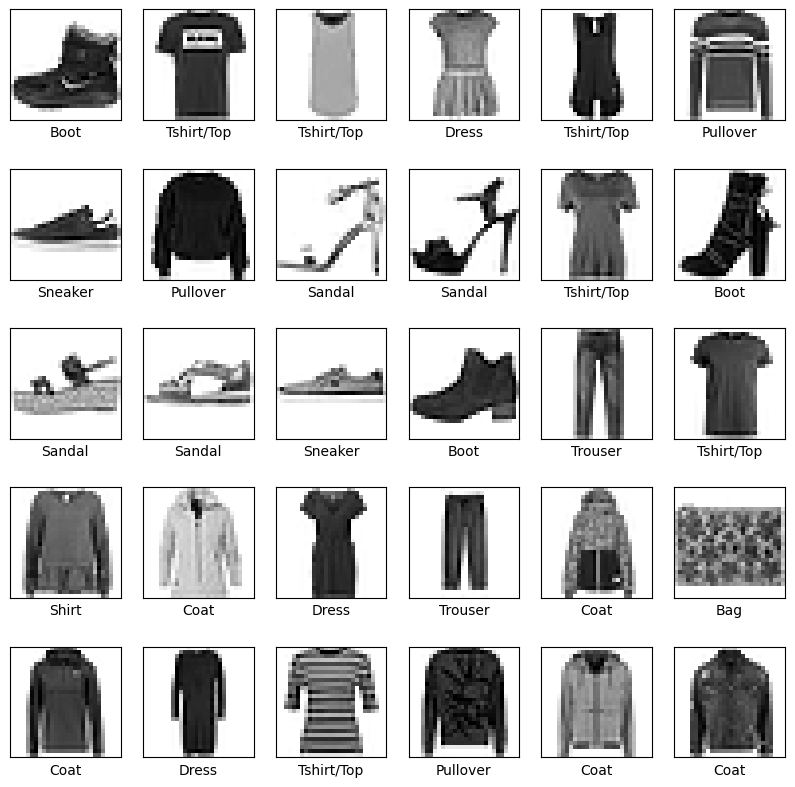

In [17]:
plt.figure(figsize=(10,10))

for  i in range(0,30):
  plt.subplot(5, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(  class_names[ train_labels[i] ]  )

plt.show()

#### Build the Model : LeNet Model Architecture

In [18]:
# Building the Model Architecture
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))

# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))

# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))

# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.

model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)

model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850

model.add(Dense(10, activation='softmax'))

Compiling model

CNN model has now to be compiled. To do so I will use:

- ADAM (ADAptive Moment estimation) 
- Loss function will be categorical_crossentropy 
- Metric will be accuracy




In [19]:
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

Summarising model

It is worth to summarise the model to see how many trainable parameters our model contains - this has a direct impact on computational power required.

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

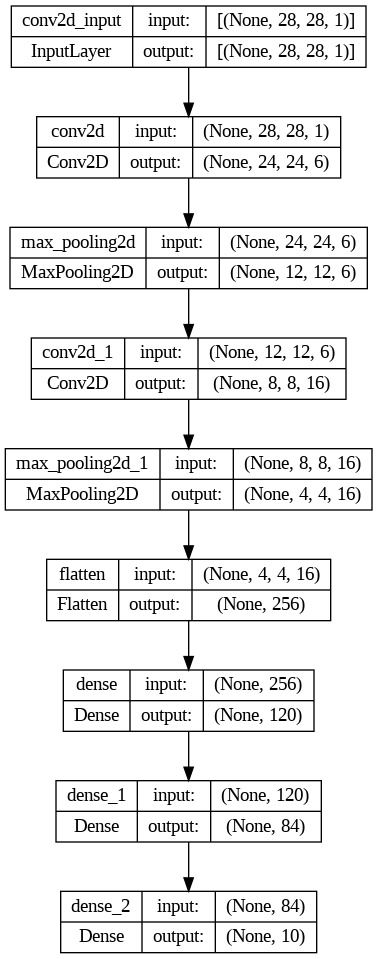

In [21]:
tf.keras.utils.plot_model(model, to_file='cnn_fmnist.png', show_shapes=True, show_layer_names=True)

In [22]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 18s 36ms/step - loss: 0.6862 - accuracy: 0.7476 - val_loss: 0.5114 - val_accuracy: 0.8106
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.4632 - accuracy: 0.8334 - val_loss: 0.4477 - val_accuracy: 0.8384
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.4012 - accuracy: 0.8543 - val_loss: 0.4072 - val_accuracy: 0.8513
Epoch 4/10
469/469 [==============================] - 17s 36ms/step - loss: 0.3689 - accuracy: 0.8642 - val_loss: 0.3780 - val_accuracy: 0.8636
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.3463 - accuracy: 0.8743 - val_loss: 0.3919 - val_accuracy: 0.8558
Epoch 6/10
469/469 [==============================] - 17s 36ms/step - loss: 0.3286 - accuracy: 0.8792 - val_loss: 0.3508 - val_accuracy: 0.8694
Epoch 7/10
469/469 [==============================] - 18s 37ms/step - loss: 0.3108 - accuracy: 0.8849 - val_loss: 0.3354 - val_accuracy:

Evaluating model with a test data

Now the model will be evaluated on test sets.

In [23]:
score = model.evaluate(x_test, y_test , verbose=0)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.35071077942848206
Test accuracy: 0.8719000220298767


Tracking Learning

It is possible to monitor the learning process of our model by accessing its history with .history attribute of previously defined tracker. It is worth looking at how the loss function was developing for both testing and validation sets. It is possible to spot if we have already a problem with overfitting - test set loss function will be decreasing while validation's loss function after reaching a minimum value starts to increase again.

In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


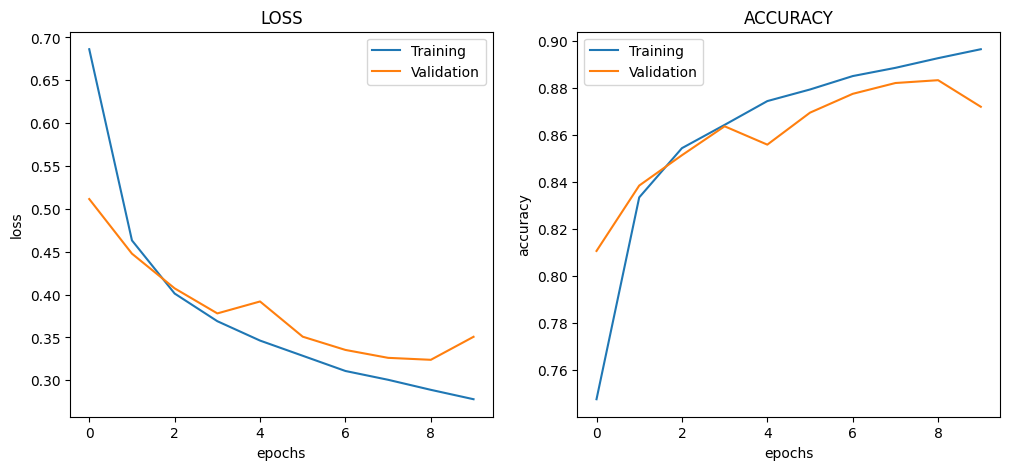

In [30]:
fig, axes = plt.subplots(1, 2)
for ax, label in zip(axes, ['loss', 'accuracy']):
    ax.plot(history.history[label], label='Training')
    ax.plot(history.history['val_'+label], label='Validation')
    ax.legend()
    ax.set_xlabel('epochs')
    ax.set_ylabel(label)
    ax.set_title(label.upper())
fig.set_size_inches(12, 5)

In [31]:
# Above Plot in individual code
'''
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(history.history["loss"], label = "training_loss")
ax.plot(history.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()
'''
# ---------------------

'''
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(history.history["accuracy"], label = "training_accuracy")
ax.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
ax.legend(loc = 'best', shadow = True,)
plt.show()

'''


'\nfig, ax = plt.subplots(figsize=(8,6))\nax.plot(history.history["accuracy"], label = "training_accuracy")\nax.plot(history.history["val_accuracy"], label = "val_accuracy")\nplt.xlabel("epochs")\nplt.ylabel("accuracy")\nax.legend(loc = \'best\', shadow = True,)\nplt.show()\n\n'

#### Make Predictions

In [55]:
#Make Predictions
probability_model = tf.keras.Sequential([model,  tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


#### Verify Predictions

In [65]:
# Verify Predictions

class_names = ['Tshirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']
y_predict = class_names[np.argmax(predictions[1])]
y_predict

'Pullover'

In [66]:
y_actual = class_names[test_labels[1]]
y_actual

'Pullover'

visualize and find the particular fashion MNIST dataset from the test dataset :

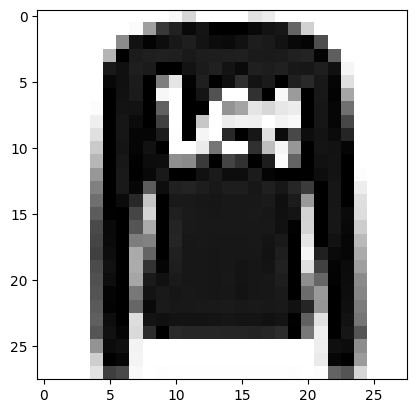

In [67]:
img = x_test[1]
plt.imshow(img, cmap='Greys')

Summary :

This was all about Lenet-5 architecture. Finally, to summarize The network has

- 5 layers with learnable parameters.

- The input to the model is a grayscale image.

- It has 3 convolution layers, two average pooling layers, and two fully connected layers with a softmax classifier.

- The number of trainable parameters is 60000.